In [1]:
from pyciss import io
import gdal
plt.rcParams['image.interpolation'] = 'none'
%matplotlib inline
from pyciss.io import CubeFile
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

In [3]:
fnames = io.get_cube_filelist()

In [102]:
fname = fnames[fnames.str.contains('N1540680887_1')]
fname

102    /Volumes/Data/ciss/opus/N1540680887/N154068088...
dtype: object

In [103]:
ds = gdal.Open(fname.values[0])

In [123]:
img = ds.ReadAsArray()
img[img<0]=0

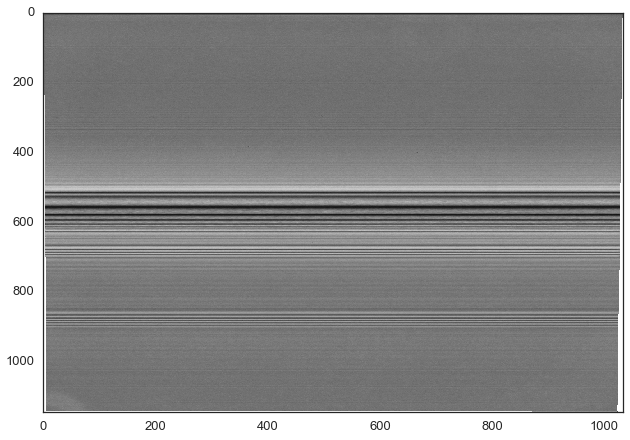

In [124]:
plt.imshow(equalize_adapthist(img))

In [125]:
subframe = img[490:700]

In [126]:
from skimage.exposure import equalize_adapthist, equalize_hist

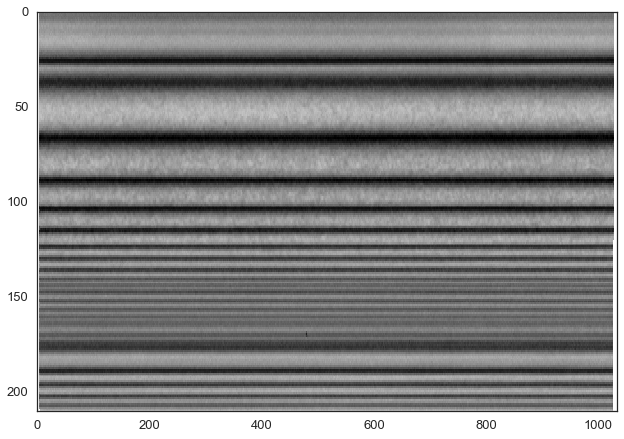

In [127]:
plt.imshow(equalize_adapthist(subframe))

In [128]:
mean_value = np.nanmean(subframe, axis=1)

In [129]:
subtracted = subframe - mean_value[:, np.newaxis]

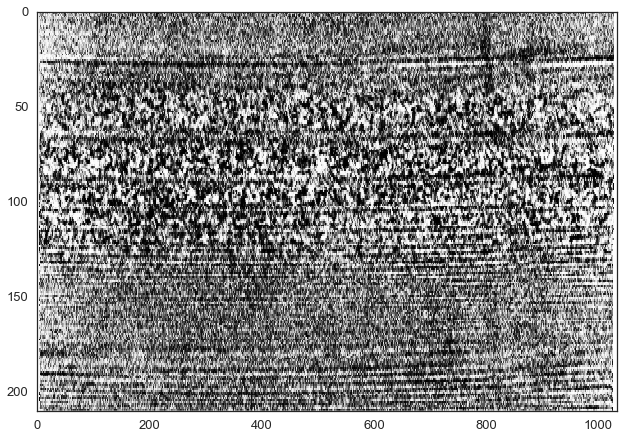

In [134]:
plt.imshow(equalize_hist(subtracted), interpolation=None)

In [135]:
toauto = equalize_hist(subtracted)

In [122]:
testdata = np.zeros((100,100))

In [123]:
for i in range(100):
    testdata[i,i] = 1
    try:
        testdata[i, i+10] = 1
    except:
        pass

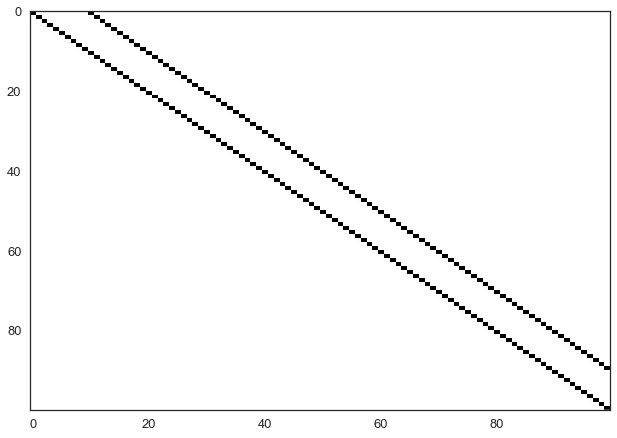

In [124]:
plt.imshow(testdata)

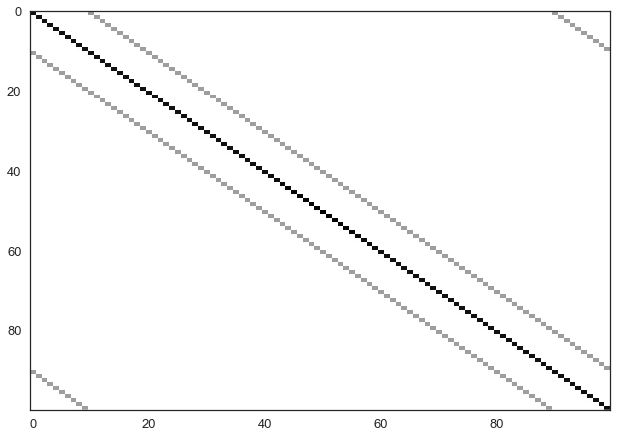

In [324]:
plt.imshow(do_autocorr(testdata))

In [29]:
from skimage.io import imread

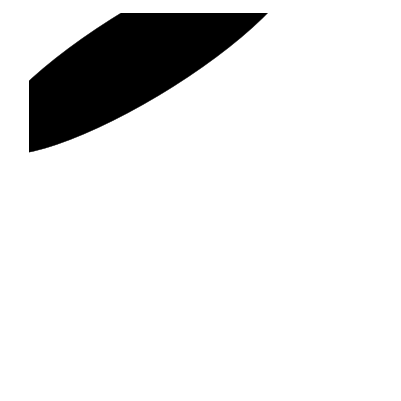

In [478]:
from pylab import figure, show, rand, subplots_adjust
from matplotlib.patches import Ellipse

NUM = 1

w = 10
ells = [Ellipse(xy=rand(2)*10, width=w, height=w*0.25, angle=rand()*3 +30)
        for i in range(NUM)]

fig = figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(1)
    e.set_facecolor('k')

subplots_adjust(top=1, bottom=0, left=0, right=1)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.axis('off')
plt.savefig('testimage.png',dpi=100, facecolor='w', edgecolor='w', transparent=True)


In [479]:
data = imread('testimage.png', as_grey=True)

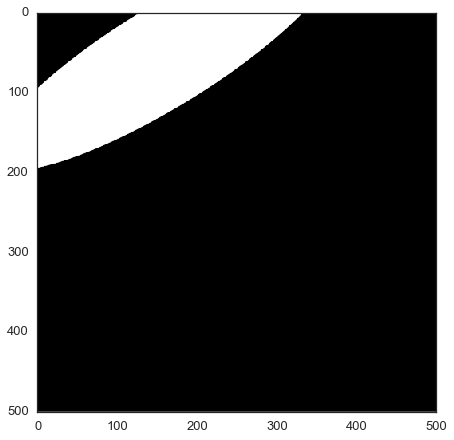

In [480]:
plt.imshow(data, aspect='equal')

In [30]:
def do_autocorr(img):
    F1 = np.fft.fft2(img)
    psd = np.abs(F1)**2
    invert = np.fft.ifft2(psd)
    invert = np.fft.fftshift(invert)
    return invert.real

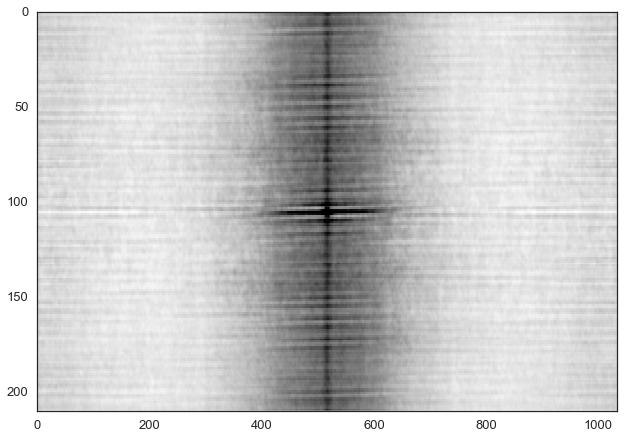

In [136]:
autocorr = do_autocorr(toauto)
plt.imshow(autocorr, vmax=np.percentile(autocorr, 99.9))

ValueError: x must have at least one data point

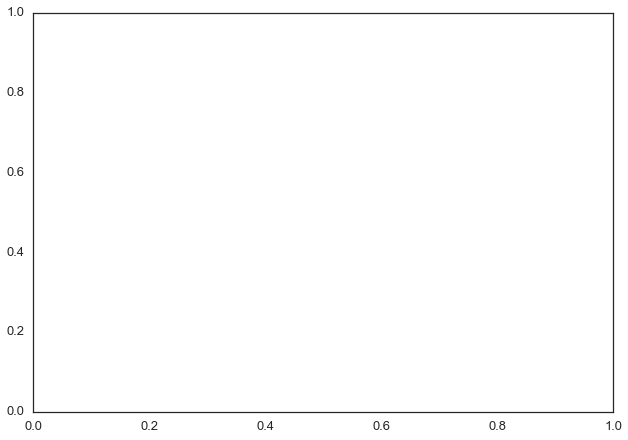

In [122]:
plt.hist(autocorr[~np.isnan(autocorr)].ravel(), 100)

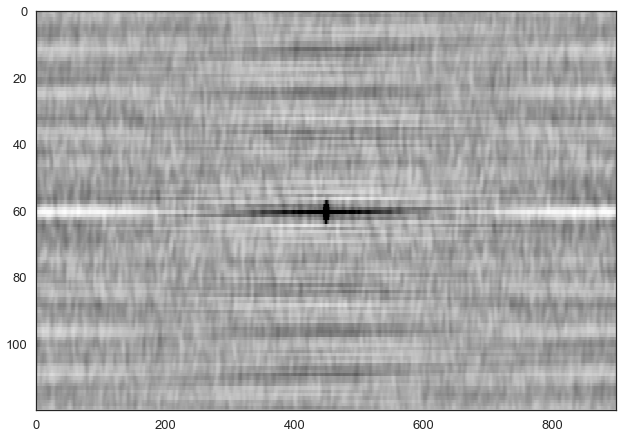

In [34]:
plt.imshow(autocorr, vmax=np.percentile(autocorr, 99.9), aspect='auto')

In [360]:
double = np.log10(np.abs(do_autocorr(new)))

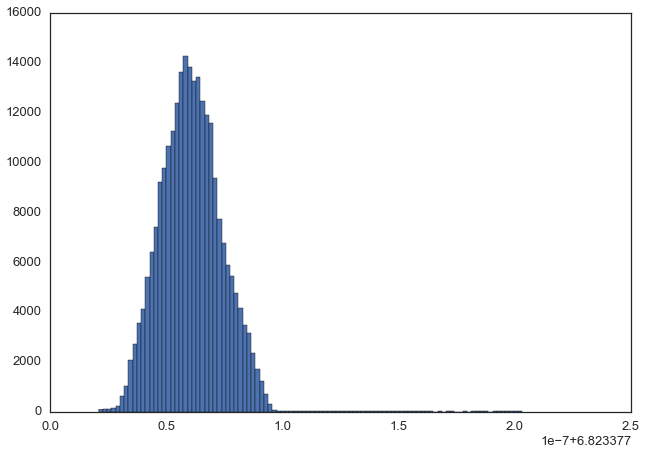

In [364]:
plt.hist(double.ravel(), 100);

In [365]:
double.max()

6.8233772032555811

In [366]:
np.percentile(double, 90)

6.8233770785281447

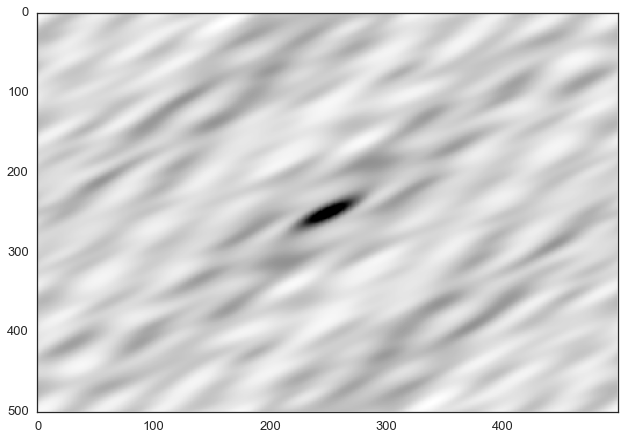

In [374]:
plt.imshow(double, vmax=np.percentile(double, 99.9))